<a href="https://colab.research.google.com/github/Varshith100/IO_assignment/blob/main/Assignment_1_(linear_and_polynomial_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dataset = pd.read_csv('SwedishMotorInsurance.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 5:7])
x[:, 5:7] = imputer.transform(x[:, 5:7])

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [14]:
import pandas as pd
data = pd.read_csv('SwedishMotorInsurance.csv')
print(data.head())

   Kilometres  Zone  Bonus  Make  Insured  Claims  Payment
0           1     1      1     1   455.13     108   392491
1           1     1      1     2    69.17      19    46221
2           1     1      1     3    72.88      13    15694
3           1     1      1     4  1292.39     124   422201
4           1     1      1     5   191.01      40   119373


In [15]:
print(data.describe())

        Kilometres         Zone        Bonus         Make        Insured  \
count  2182.000000  2182.000000  2182.000000  2182.000000    2182.000000   
mean      2.985793     3.970211     4.015124     4.991751    1092.195270   
std       1.410409     1.988858     2.000516     2.586943    5661.156245   
min       1.000000     1.000000     1.000000     1.000000       0.010000   
25%       2.000000     2.000000     2.000000     3.000000      21.610000   
50%       3.000000     4.000000     4.000000     5.000000      81.525000   
75%       4.000000     6.000000     6.000000     7.000000     389.782500   
max       5.000000     7.000000     7.000000     9.000000  127687.270000   

            Claims       Payment  
count  2182.000000  2.182000e+03  
mean     51.865720  2.570076e+05  
std     201.710694  1.017283e+06  
min       0.000000  0.000000e+00  
25%       1.000000  2.988750e+03  
50%       5.000000  2.740350e+04  
75%      21.000000  1.119538e+05  
max    3338.000000  1.824503e+07  


Kilometres       Axes(0.125,0.11;0.0945122x0.77)
Zone          Axes(0.238415,0.11;0.0945122x0.77)
Bonus         Axes(0.351829,0.11;0.0945122x0.77)
Make          Axes(0.465244,0.11;0.0945122x0.77)
Insured       Axes(0.578659,0.11;0.0945122x0.77)
Claims        Axes(0.692073,0.11;0.0945122x0.77)
Payment       Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

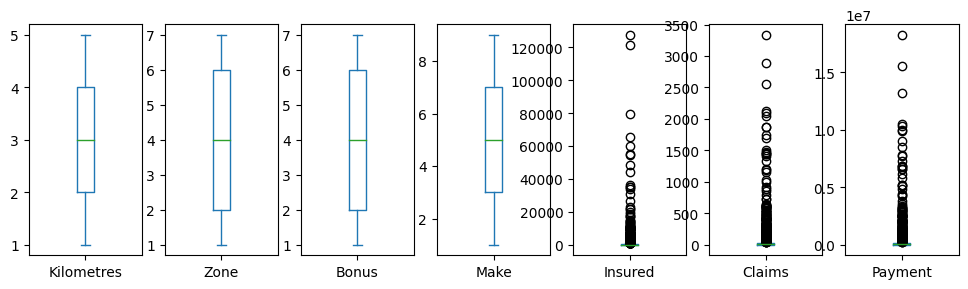

In [16]:
data.plot(kind='box', subplots=True, figsize=(12,3))


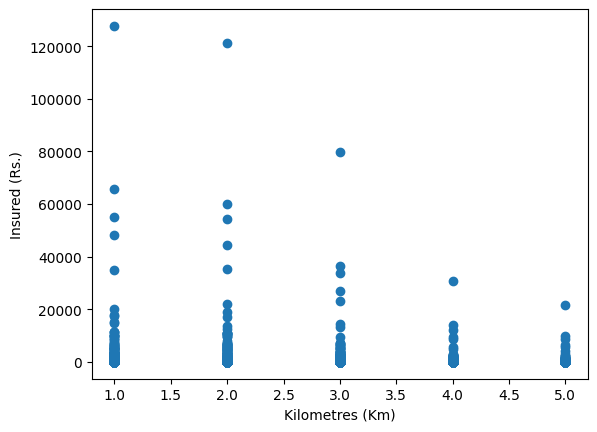

In [17]:
import matplotlib.pyplot as plt
plt.scatter(data['Kilometres'],data['Insured'])

plt.xlabel('Kilometres (Km)')
plt.ylabel('Insured (Rs.)')
plt.show()

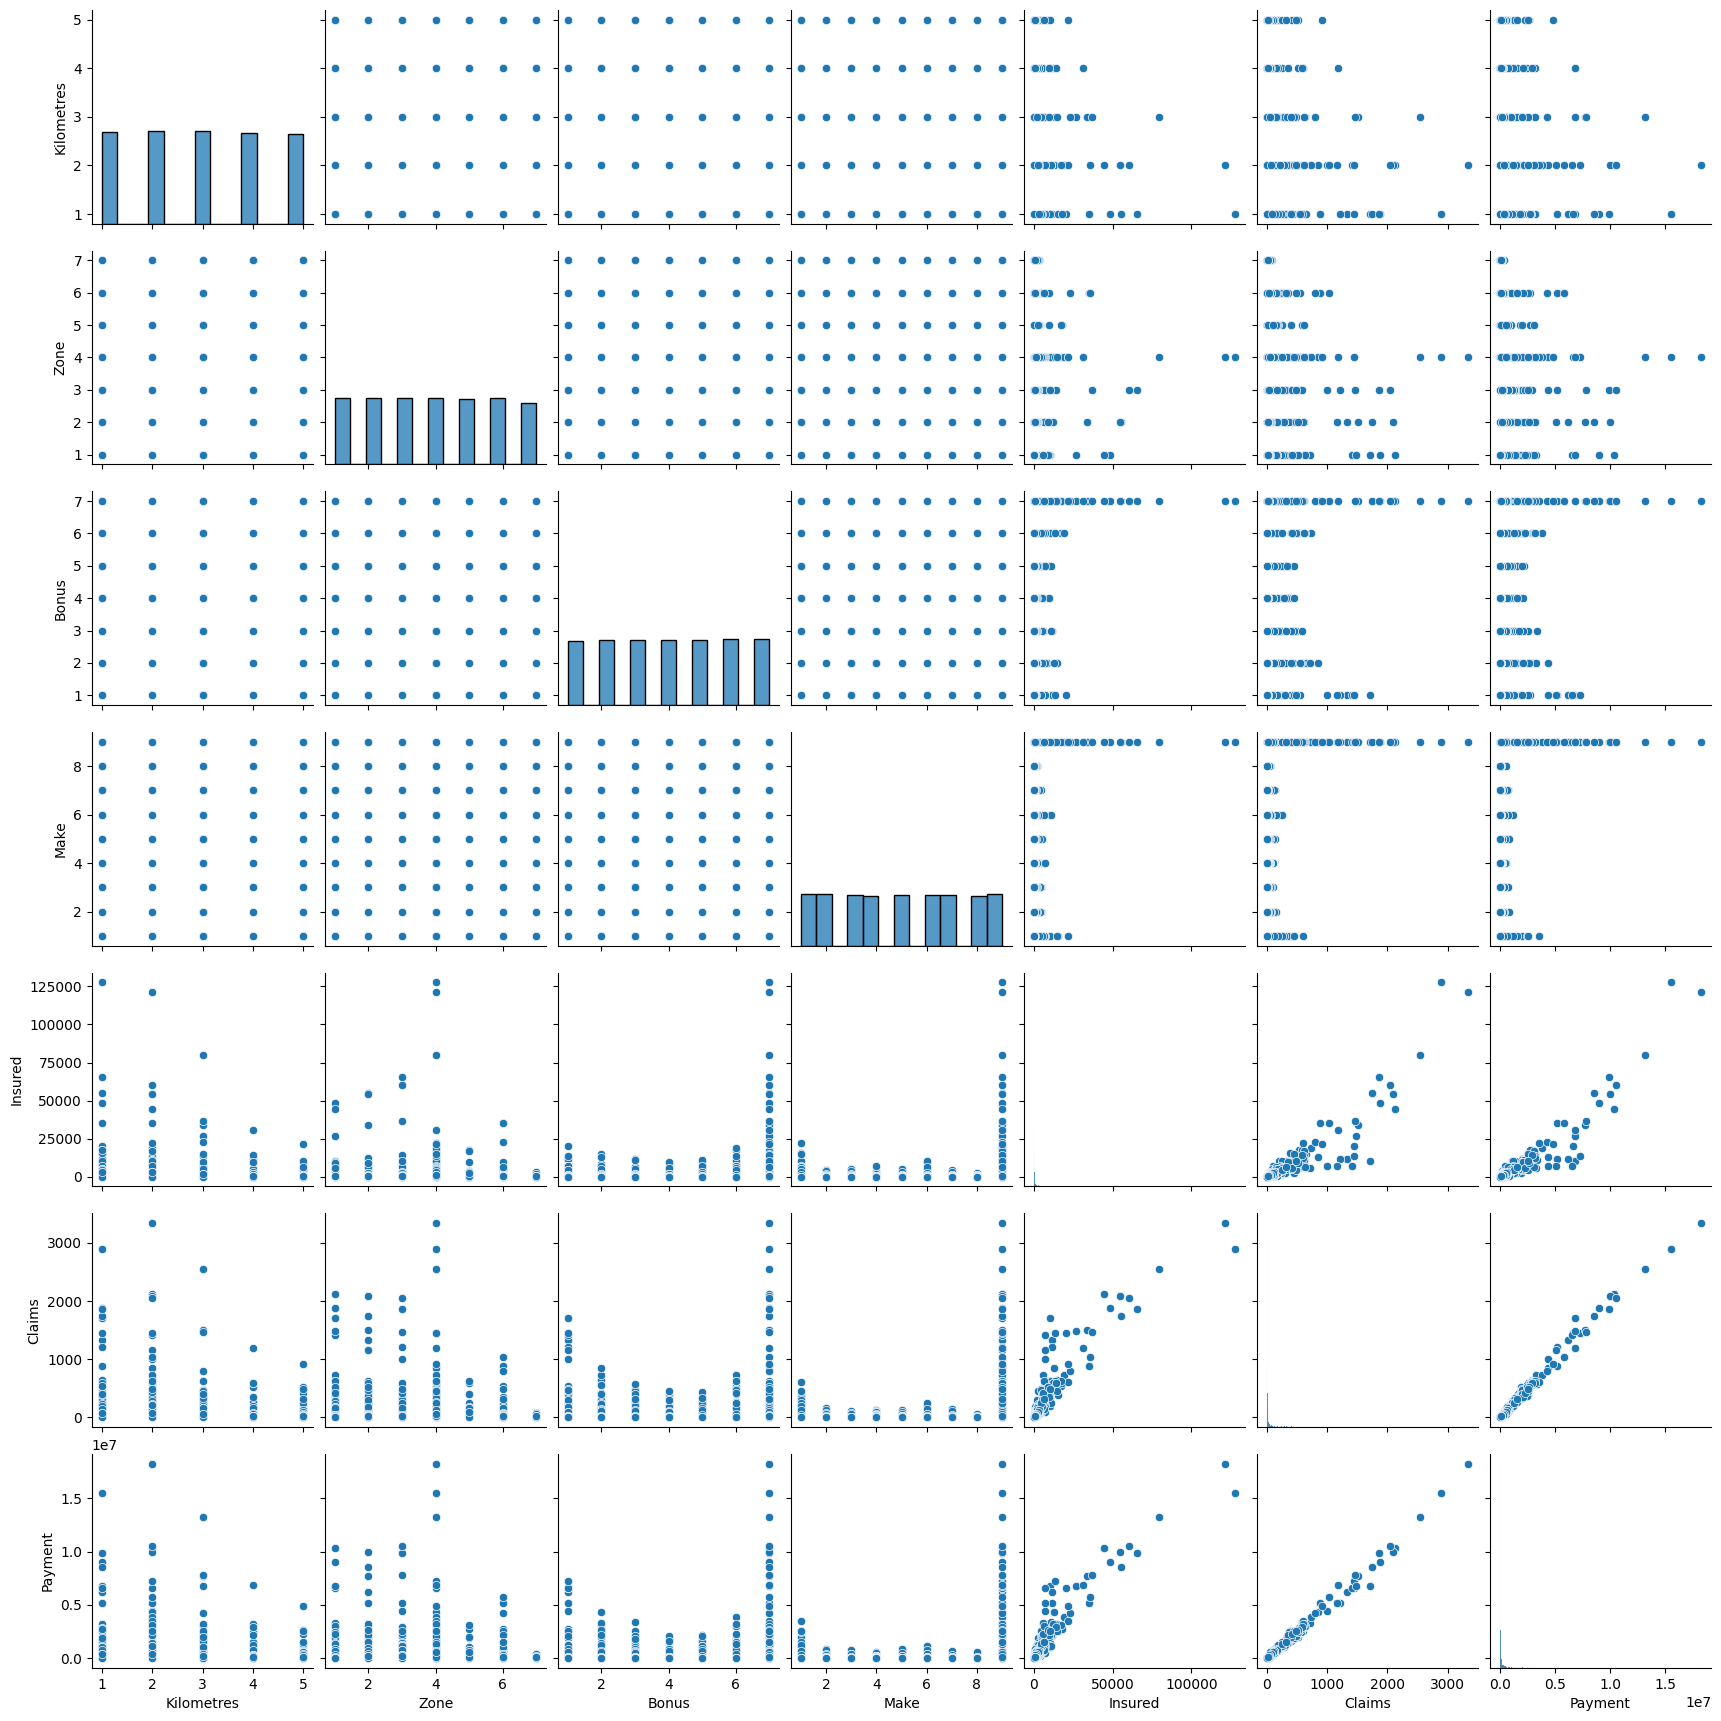

In [18]:
import seaborn as sns
sns.pairplot(data)

<Axes: >

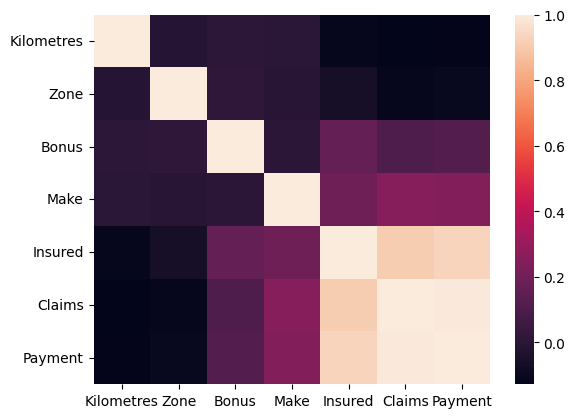

In [19]:
import seaborn as sns
sns.heatmap(data.corr())

LINEAR REGRESSION MODEL

In [20]:
dataset = pd.read_csv('SwedishMotorInsurance.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values


In [21]:
print(x)

[[  1.     1.     1.   455.13 108.  ]
 [  1.     1.     2.    69.17  19.  ]
 [  1.     1.     3.    72.88  13.  ]
 ...
 [  7.     7.     7.     2.83   1.  ]
 [  7.     7.     8.    13.06   0.  ]
 [  7.     7.     9.   384.87  16.  ]]


In [22]:
print(y)

[392491  46221  15694 ...    966      0 112252]


In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
prediction = lin_reg.predict([[6, 6, 6, 799, 89]])
print("Linear Regression Prediction:", prediction)

Linear Regression Prediction: [415184.55722798]


In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
lin_reg_2.coef_

array([ 1.37146807e-01,  3.69395511e-01, -2.08140975e-03, -2.37316416e-03,
        2.89138893e-01,  4.33439771e-02, -1.82552681e-02, -1.42362237e-02,
       -1.87084110e-02,  6.53483560e-01,  9.69914661e-02, -1.23806394e-02,
       -1.55816270e-02,  6.50650792e-01,  8.12000955e-02, -2.12023747e-02,
        5.36286620e-01,  1.17813808e-01, -3.67921655e-01,  1.06185490e+01,
        2.23946290e+00, -1.35483717e-01, -1.00418472e-01, -1.30568448e-01,
        1.95937574e+00,  3.14880386e-01, -8.40089492e-02, -9.99408001e-02,
        1.31477230e+00,  1.17494116e-01, -1.45562203e-01,  1.64161184e+00,
        3.25499635e-01,  3.42340354e-02, -5.18529784e-01,  2.35802575e+00,
       -8.05118800e-02, -8.91879158e-02,  1.61065081e+00,  1.98803517e-01,
       -1.18575116e-01,  1.02728492e+00,  2.12056736e-01,  3.47553866e-02,
       -1.17869788e+00,  2.48044796e+00, -1.73823987e-01,  1.35829914e+00,
        6.10488193e-01,  3.51066748e-02, -7.97470610e-01,  2.77344818e+00,
        1.39727017e-05, -

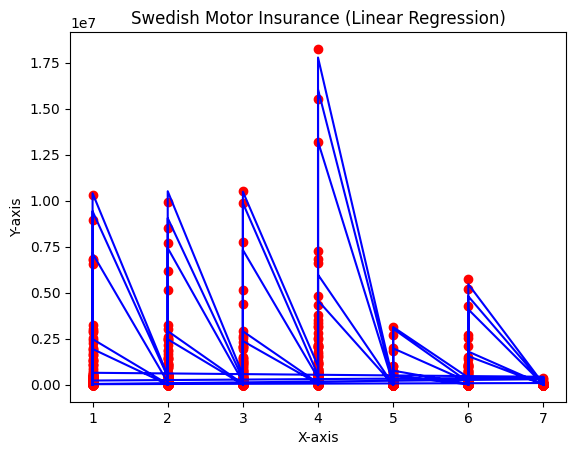

In [25]:
plt.scatter(x[:, 0], y, color='red')
plt.plot(x[:, 0], lin_reg.predict(x), color='blue')
plt.title('Swedish Motor Insurance (Linear Regression)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

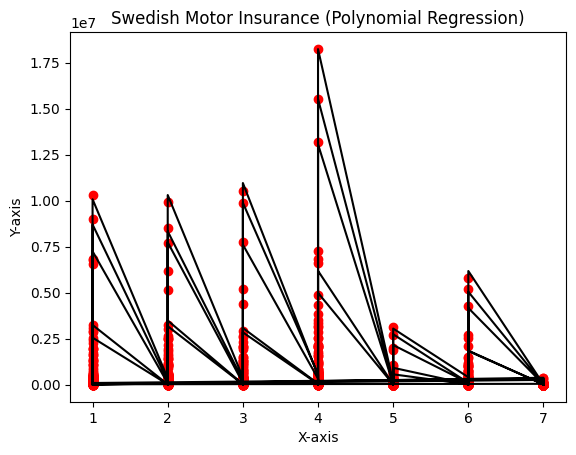

In [26]:
plt.scatter(x[:, 0], y, color='red')
plt.plot(x[:, 0], lin_reg_2.predict(poly_reg.fit_transform(x)), color='black')
plt.title('Swedish Motor Insurance (Polynomial Regression)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [27]:
lin_reg.predict([[2,2,2,567,789]])

array([3414583.67603105])

In [28]:
lin_reg_2.predict(poly_reg.fit_transform([[2,2,2,567,789]]))

array([-1.60051615e+08])

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

x = sc_X.fit_transform(x)
y = y.reshape(-1, 1)
y = sc_y.fit_transform(y)


In [30]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(x, y.ravel())

predictions = regressor.predict(x)
print(predictions)


[ 0.23385805 -0.12866137 -0.16542689 ... -0.16725201 -0.15279009
 -0.04635109]


In [31]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[2,3,4,111,178]])).reshape(-1,1))

array([[907488.95229042]])

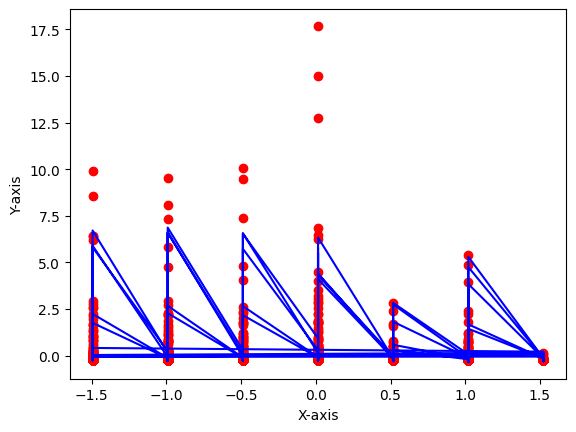

In [32]:
plt.scatter(x[:, 0], y, color = 'red')
plt.plot(x[:, 0], regressor.predict(x).reshape(-1,1), color = 'blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()